<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Activity" data-toc-modified-id="Activity-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Activity</a></span></li><li><span><a href="#Libraries" data-toc-modified-id="Libraries-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Libraries</a></span></li><li><span><a href="#Setting-up-the-data" data-toc-modified-id="Setting-up-the-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Setting up the data</a></span></li><li><span><a href="#Modeling-changes-to-a-tissue-during-infection" data-toc-modified-id="Modeling-changes-to-a-tissue-during-infection-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Modeling changes to a tissue during infection</a></span></li><li><span><a href="#Run-simulation-and-visualize" data-toc-modified-id="Run-simulation-and-visualize-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Run simulation and visualize</a></span></li><li><span><a href="#How-immune-cells-affect-infection" data-toc-modified-id="How-immune-cells-affect-infection-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>How immune cells affect infection</a></span></li><li><span><a href="#Plot-infection-with-immune-system-over-time" data-toc-modified-id="Plot-infection-with-immune-system-over-time-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Plot infection with immune system over time</a></span></li></ul></div>

# Activity

    
    Imagine a tissue with n x n cells with different states:
    
    H: Healthy
    VA: Viral assembly
    VR: Viral release
    D: Dead
    
    INFECT_PROB = probability of infection (i.e. the likelihood of a cell becoming infected)
    
    

In [ ]:
# import sys
# !{sys.executable} -m pip install plotly

# Libraries

In [67]:
#Importing libraries: computer code 'cookbooks'

import matplotlib.pyplot
import pandas as pd
import numpy as np
import random
import plotly as py
import plotly.graph_objs as go
import copy

import matplotlib.pyplot as plt

# Setting up the data

In [35]:
def setUpData(n, max_starting_infected, popSize, infect_prob):
    """
    n size of tissue
    max_starting_infected: max number of cells in tissue that could start as infected, all others are healthy
    infect_prob: probality that a healthy cell that is next to a VR cell gets infected on one timestep
    
    returns: pop: list of individuals in population, where an individual [row, col, state, susptablity, infectivity, ageInfect]
    S: susptablity of 1, infectivity: 0
    I: susptablity of 0, infectivity: infect_prob
    R: susptablity of 0.2, infectivity: 0
    
    """
    
    pop = []
    
    n_starting_infected = random.randint(0, max_starting_infected) 
    points_I = set()
    while len(points_I) < n_starting_infected:
        points_I.add((random.randint(0, n-1), random.randint(0, n-1))) 
    for cord in points_I:
        pop.append([cord[0], cord[1], "I", 0, infect_prob, 0])
        
    n_susceptible = popSize - n_starting_infected
    points_S = set()
    while len(points_S) < n_susceptible:
        points_S.add((random.randint(0, n-1), random.randint(0, n-1))) 
    for cord in points_S:
        pop.append([cord[0], cord[1], "S", 1, 0, 0])
        
    return pop


def assignTissue(n, pop):
    tissue = pd.DataFrame("-", index = range(n), columns = range(n))
    for person in pop:
        tissue.iloc[person[0], person[1]] = person[2]
    return tissue

pop = setUpData(10, 3, 10, 0.9) 
assignTissue(n, pop)

,0,1,2,3,4,5,6,7,8,9
0,-,-,-,-,-,-,-,-,-,-
1,-,-,-,-,-,-,-,-,-,I
2,-,-,-,-,-,-,-,-,S,-
3,-,-,-,-,-,-,-,-,-,-
4,-,-,-,-,-,-,S,-,-,-
5,-,-,-,-,-,-,-,-,-,-
6,-,-,-,-,-,-,-,S,-,-
7,-,-,I,-,S,S,-,-,-,S
8,-,-,S,-,-,-,-,-,S,-
9,-,-,-,-,-,-,-,-,-,-


# Modeling changes to a tissue during infection

    Next stages for:
    
        Healthy cell: 
            If adjacent to cells releasing viruses (i.e. "VR"), give a random probability between 0 and 1.
            If probability <= INFECT_PROB, healthy cell is infected and becomes H -> VA
            
        Viral assembly:
            Release of viruses (i.e. VA -> VR)
            
        Viral release:
            Dies (i.e. VR -> D)
            
        Dead cell:
            No change
            
            

In [53]:
def one_time_step(n, pop):
    """
    check all population if infectivity next to susptablity; and infect based on prob
    [row, col, state, susptablity, infectivity, ageInfect]
    TODO move individuals randomly
    """
    pop_new = copy.deepcopy(pop)
    for p1 in pop:
        p1_infect = p1[4]
        for i in range(len(pop)):
            p2 = pop[i]
            if abs(p1[0]-p2[0]) <= 3:
                if abs(p1[1]-p2[1]) <= 3:
                    if random.random() < p1_infect*p2[3]: #infectivity of p1 times susptablity of p2
                        pop_new[i][2] = "I"
                        pop_new[i][3] = 0
                        pop_new[i][4] = p1_infect
                        pop_new[i][5] = 0
                        
    for p1 in pop_new:
        if p1[2] == "I":
            if p1[5] == 10:
                p1[2] = "R"
                p1[3] = 0.2
                p1[4] = 0
                p1[5] = 0
            else:
                p1[5] += 1 #update ageInfect counter
        row = p1[0] +  random.randint(-1, 1)
        if row < 0:
            row = 0
        if row >= n:
            row = n-1
        p1[0] = row
        col = p1[1] +  random.randint(-1, 1)
        if col < 0:
            col = 0
        if col >= n:
            col = n-1
        p1[1] = col 
    return pop_new
        
# pop = setUpData(10, 3, 10, 0.9) 
# print(assignTissue(n, pop))
# pop = one_time_step(n, copy.deepcopy(pop))
# print(assignTissue(n, pop))


In [54]:

def t_time_step(t, n, pop):
    tissue = assignTissue(n, pop) 
    out_tissue = [tissue]
    out_pop = [pop]
    for step in range(t):
        pop = one_time_step(n, copy.deepcopy(pop))
        updated_tissue = assignTissue(n, pop) 
        out_tissue.append(updated_tissue.values)
        out_pop.append(pop)
    return out_tissue, out_pop

In [55]:
INFECT_PROB = 0.9 
n = 5 # size of tissue
max_starting_infected = 3 
t = 3
    
pop = setUpData(n, max_starting_infected, popSize, INFECT_PROB)

out_tissue, out_pop = t_time_step(t, n, copy.deepcopy(pop))


for h in out_pop:
    print("NEXT STEP")
    print(h)
    
print("FIRST POP")
print(assignTissue(n, out_pop[0]))   
print("LAST POP")
print(assignTissue(n, out_pop[-1]))   


NEXT STEP
[[1, 2, 'S', 1, 0, 0], [3, 2, 'S', 1, 0, 0], [0, 0, 'S', 1, 0, 0], [1, 3, 'S', 1, 0, 0], [3, 3, 'S', 1, 0, 0], [3, 0, 'S', 1, 0, 0], [0, 2, 'S', 1, 0, 0], [1, 0, 'S', 1, 0, 0], [3, 1, 'S', 1, 0, 0], [2, 1, 'S', 1, 0, 0], [1, 4, 'S', 1, 0, 0], [2, 0, 'S', 1, 0, 0], [1, 1, 'S', 1, 0, 0], [4, 3, 'S', 1, 0, 0], [2, 2, 'S', 1, 0, 0], [3, 4, 'S', 1, 0, 0], [0, 3, 'S', 1, 0, 0], [4, 1, 'S', 1, 0, 0], [2, 4, 'S', 1, 0, 0], [4, 0, 'S', 1, 0, 0]]
NEXT STEP
[[2, 1, 'S', 1, 0, 0], [4, 3, 'S', 1, 0, 0], [1, 0, 'S', 1, 0, 0], [0, 2, 'S', 1, 0, 0], [4, 3, 'S', 1, 0, 0], [4, 0, 'S', 1, 0, 0], [0, 3, 'S', 1, 0, 0], [2, 0, 'S', 1, 0, 0], [3, 0, 'S', 1, 0, 0], [2, 1, 'S', 1, 0, 0], [1, 4, 'S', 1, 0, 0], [2, 0, 'S', 1, 0, 0], [2, 0, 'S', 1, 0, 0], [4, 4, 'S', 1, 0, 0], [3, 1, 'S', 1, 0, 0], [3, 4, 'S', 1, 0, 0], [1, 4, 'S', 1, 0, 0], [4, 2, 'S', 1, 0, 0], [1, 3, 'S', 1, 0, 0], [4, 0, 'S', 1, 0, 0]]
NEXT STEP
[[2, 1, 'S', 1, 0, 0], [4, 3, 'S', 1, 0, 0], [1, 1, 'S', 1, 0, 0], [1, 3, 'S', 1, 0, 0],

In [ ]:
tissue

# Run simulation and visualize

In [59]:
INFECT_PROB = 1
n = 25 # size of tissue
max_starting_infected = 5 
t = 20
popSize = 20


pop = setUpData(n, max_starting_infected, popSize, INFECT_PROB)
tissue_frames, pop_frames = t_time_step(t, n, copy.deepcopy(pop))



In [84]:

INFECT_PROB = 1
n = 25 # size of tissue
max_starting_infected = 10
t = 20
popSize = 30


pop = setUpData(n, max_starting_infected, popSize, INFECT_PROB)
tissue_frames, pop_frames = t_time_step(t, n, copy.deepcopy(pop))


S_l = []
I_l = []
R_l = []
for pop in pop_frames:
    Scount = 0
    Icount = 0
    Rcount = 0
    for p1 in pop:
        if p1[2] == "S":
            Scount += 1
        if p1[2] == "I":
            Icount += 1
        if p1[2] == "R":
            Rcount += 1
    S_l.append(Scount)
    I_l.append(Icount)
    R_l.append(Rcount)
times_l = list(range(len(pop_frames)))
    



[25, 19, 12, 10, 8, 8, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]


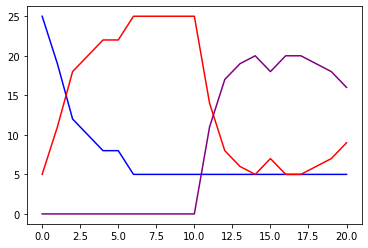

In [85]:
times_l
print(S_l)
plt.plot(times_l, S_l, color = "blue")
plt.plot(times_l, I_l, color = "red")
plt.plot(times_l, R_l, color = "purple")

In [74]:
pop

[[7, 4, 'S', 1, 0, 0],
 [15, 18, 'S', 1, 0, 0],
 [22, 17, 'S', 1, 0, 0],
 [4, 13, 'S', 1, 0, 0],
 [3, 19, 'S', 1, 0, 0],
 [18, 4, 'S', 1, 0, 0],
 [9, 24, 'S', 1, 0, 0],
 [17, 18, 'S', 1, 0, 0],
 [4, 17, 'S', 1, 0, 0],
 [16, 0, 'S', 1, 0, 0],
 [9, 16, 'S', 1, 0, 0],
 [20, 16, 'S', 1, 0, 0],
 [13, 21, 'S', 1, 0, 0],
 [1, 22, 'S', 1, 0, 0],
 [2, 16, 'S', 1, 0, 0],
 [23, 2, 'S', 1, 0, 0],
 [13, 19, 'S', 1, 0, 0],
 [3, 0, 'S', 1, 0, 0],
 [22, 23, 'S', 1, 0, 0],
 [1, 10, 'S', 1, 0, 0]]

In [68]:
#Plot simulation - do not worry about what is happening in code here, just what movie it makes
numerify = {'-': 0, 'S': 0.25, 'I': 0.5, 'R': 0.75}

legend_colors = [
    [0, "#56B4E9"],
    [0.25,  "#56B4E9"],
    [0.25, "#F0E442"],
    [0.5, "#F0E442"],
    [0.5, "#D55E00"],
    [0.75, "#D55E00"],
    [0.75, "#000000"],
    [1.0, "#000000"]
]

numbers = [0, 0.25, 0.5, 0.75]
names   = [' ', 'Suseptible', 'Infecious', 'Recovered']


# Numerify the cells for plotting
tissue_frames_numeric = []
for t in range(len(tissue_frames)):
    tissue_frames_numeric.append(tissue_frames[t].copy())
    for i in range(tissue_frames[t].shape[0]):
        for j in range(tissue_frames[t].shape[1]):
            tissue_frames_numeric[t][i][j] = numerify[tissue_frames[t][i][j]]
            
fig = go.Figure(data=go.Heatmap(z=tissue_frames_numeric[0], colorscale=legend_colors, colorbar=dict(tickvals=numbers, ticktext=names, thickness=25)),
               frames=[go.Frame(data=go.Heatmap(z=tissue_frames_numeric[i])) for i in range(len(tissue_frames_numeric))])
fig.update_layout(
    updatemenus=[
        dict(type="buttons", visible=True,
        buttons=[dict(label="Play", method="animate", args=[None])]
            )])
fig.show()